<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Data_Engineering_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [2]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=80636659a9a970b0132c139bc5adec46fe3f621ed032bb0a9ed6619063452b0d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, StringType
import pyspark.sql  as pyspark_sql
from pyspark.sql.functions import col
from pyspark import SparkContext, SparkConf
from google.colab import drive

#Loading Dataset

In [4]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

In [5]:
schema = StructType([
    StructField("HCHO reading", DoubleType(), True),
    StructField("Location", StringType(), True),
    StructField("Current Date", StringType(), True),
    StructField("Next Date", StringType(), True)
])


In [6]:
drive.mount("/content/drive")

col_mat_nuw_data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/col_mat_nuw_output.csv", header=True, schema=schema)
kan_data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/kan_output.csv", header=True, schema=schema)
mon_kur_jaf_data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/mon_kur_jaf_output.csv", header=True, schema=schema)

Mounted at /content/drive


In [7]:
print("Colombo, Matara & Nuwara Eliya")
col_mat_nuw_data.printSchema()

print("Kandy")
kan_data.printSchema()

print("Monaragala, Kurunegala & Jaffna")
mon_kur_jaf_data.printSchema()

Colombo, Matara & Nuwara Eliya
root
 |-- HCHO reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)

Kandy
root
 |-- HCHO reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)

Monaragala, Kurunegala & Jaffna
root
 |-- HCHO reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)



In [8]:
col_mat_nuw_data.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|  2019-01-14|2019-01-15|
|6.37441

In [9]:
kan_data.show()

+--------------------+------------+------------+----------+
|        HCHO reading|    Location|Current Date| Next Date|
+--------------------+------------+------------+----------+
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                NULL|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|  2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|  2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|2019-01-13|
|                NULL|Kandy Proper|  2019-01-13|2019-01-14|
|                NULL|Kandy Proper|  2019-01-14|2019-01-15|
| 9.63639634671553E-5|Kandy Proper|  201

In [10]:
mon_kur_jaf_data.show()

+--------------------+------------------+------------+----------+
|        HCHO reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|                NULL|Bibile, Monaragala|  2019-01-13|2019-01-14|
|         

#Data Preprocessing

##Seperating Dataset

In [38]:
Monaragala_Data = mon_kur_jaf_data.filter(mon_kur_jaf_data['Location'] == 'Bibile, Monaragala')

In [39]:
Monaragala_Data.show()

+--------------------+------------------+------------+----------+
|        HCHO reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|                NULL|Bibile, Monaragala|  2019-01-13|2019-01-14|
|         

In [40]:
Kurunegala_Data = mon_kur_jaf_data.filter(mon_kur_jaf_data['Location'] == 'Kurunegala Proper')

In [41]:
Kurunegala_Data.show()

+--------------------+-----------------+------------+----------+
|        HCHO reading|         Location|Current Date| Next Date|
+--------------------+-----------------+------------+----------+
|8.829725542537962E-5|Kurunegala Proper|  2019-01-01|2019-01-02|
|1.370787402778218...|Kurunegala Proper|  2019-01-02|2019-01-03|
|1.480085027113037E-4|Kurunegala Proper|  2019-01-03|2019-01-04|
|-2.04637905973554...|Kurunegala Proper|  2019-01-04|2019-01-05|
|2.489134742856164E-4|Kurunegala Proper|  2019-01-05|2019-01-06|
|1.015583300177078...|Kurunegala Proper|  2019-01-06|2019-01-07|
|1.919056668190272...|Kurunegala Proper|  2019-01-07|2019-01-08|
|1.215500456138868...|Kurunegala Proper|  2019-01-08|2019-01-09|
|9.741700467262773E-5|Kurunegala Proper|  2019-01-09|2019-01-10|
|1.130342628012010...|Kurunegala Proper|  2019-01-10|2019-01-11|
|7.047632943988818E-5|Kurunegala Proper|  2019-01-11|2019-01-12|
|1.691712548577679E-4|Kurunegala Proper|  2019-01-12|2019-01-13|
|                NULL|Kur

In [42]:
Jaffna_Data = mon_kur_jaf_data.filter(mon_kur_jaf_data['Location'] == 'Jaffna Proper')

In [43]:
Jaffna_Data.show()

+--------------------+-------------+------------+----------+
|        HCHO reading|     Location|Current Date| Next Date|
+--------------------+-------------+------------+----------+
|5.830909719406619E-5|Jaffna Proper|  2019-01-01|2019-01-02|
|1.017952795536237...|Jaffna Proper|  2019-01-02|2019-01-03|
| 3.93133105404262E-5|Jaffna Proper|  2019-01-03|2019-01-04|
|-2.38398465761844...|Jaffna Proper|  2019-01-04|2019-01-05|
|1.589137302293815...|Jaffna Proper|  2019-01-05|2019-01-06|
|7.539679629744287E-5|Jaffna Proper|  2019-01-06|2019-01-07|
|1.799237734955577...|Jaffna Proper|  2019-01-07|2019-01-08|
|9.470708011674723E-5|Jaffna Proper|  2019-01-08|2019-01-09|
|2.109364950895559E-6|Jaffna Proper|  2019-01-09|2019-01-10|
|1.318967807501841...|Jaffna Proper|  2019-01-10|2019-01-11|
|1.337016372402064...|Jaffna Proper|  2019-01-11|2019-01-12|
|5.957003084127642...|Jaffna Proper|  2019-01-12|2019-01-13|
|-4.15786713782524...|Jaffna Proper|  2019-01-13|2019-01-14|
|2.010835129084908E-5|Ja

In [44]:
Colombo_Data = col_mat_nuw_data.filter(col_mat_nuw_data['Location'] == 'Colombo Proper')

In [45]:
Colombo_Data.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|  2019-01-14|2019-01-15|
|6.37441

In [46]:
Deniyaya_Matara_Data = col_mat_nuw_data.filter(col_mat_nuw_data['Location'] == 'Deniyaya, Matara')

In [47]:
Deniyaya_Matara_Data.show()

+--------------------+----------------+------------+----------+
|        HCHO reading|        Location|Current Date| Next Date|
+--------------------+----------------+------------+----------+
|                NULL|Deniyaya, Matara|  2019-01-01|2019-01-02|
|5.803530712000793E-6|Deniyaya, Matara|  2019-01-02|2019-01-03|
|2.362357772653922...|Deniyaya, Matara|  2019-01-03|2019-01-04|
|6.437245753953118E-5|Deniyaya, Matara|  2019-01-04|2019-01-05|
|5.349707092885017E-5|Deniyaya, Matara|  2019-01-05|2019-01-06|
|1.315594859189690...|Deniyaya, Matara|  2019-01-06|2019-01-07|
|6.269859896976347E-5|Deniyaya, Matara|  2019-01-07|2019-01-08|
|2.298263979970634E-5|Deniyaya, Matara|  2019-01-08|2019-01-09|
|                NULL|Deniyaya, Matara|  2019-01-09|2019-01-10|
|7.190247186715247E-5|Deniyaya, Matara|  2019-01-10|2019-01-11|
|1.542091441034087...|Deniyaya, Matara|  2019-01-11|2019-01-12|
|1.406986305217021E-4|Deniyaya, Matara|  2019-01-12|2019-01-13|
|                NULL|Deniyaya, Matara| 

In [48]:
Nuwara_Eliya_Data = col_mat_nuw_data.filter(col_mat_nuw_data['Location'] == 'Nuwara Eliya Proper')

In [49]:
Nuwara_Eliya_Data.show()

+--------------------+-------------------+------------+----------+
|        HCHO reading|           Location|Current Date| Next Date|
+--------------------+-------------------+------------+----------+
|                NULL|Nuwara Eliya Proper|  2019-01-01|2019-01-02|
|                NULL|Nuwara Eliya Proper|  2019-01-02|2019-01-03|
|1.908293886956784...|Nuwara Eliya Proper|  2019-01-03|2019-01-04|
|5.097625917127737...|Nuwara Eliya Proper|  2019-01-04|2019-01-05|
|6.456645496655256E-5|Nuwara Eliya Proper|  2019-01-05|2019-01-06|
|8.982348709518115E-5|Nuwara Eliya Proper|  2019-01-06|2019-01-07|
|4.097797651418246E-5|Nuwara Eliya Proper|  2019-01-07|2019-01-08|
|                NULL|Nuwara Eliya Proper|  2019-01-08|2019-01-09|
|                NULL|Nuwara Eliya Proper|  2019-01-09|2019-01-10|
|                NULL|Nuwara Eliya Proper|  2019-01-10|2019-01-11|
|3.914670787137749E-5|Nuwara Eliya Proper|  2019-01-11|2019-01-12|
|                NULL|Nuwara Eliya Proper|  2019-01-12|2019-01

Saving Seperated Datasets

In [50]:
import pandas as pd

In [51]:
# Convert the subset data to Pandas DataFrame
Monaragala_Data_pd = Monaragala_Data.toPandas()
Kurunegala_Data_pd = Kurunegala_Data.toPandas()
Jaffna_Data_pd = Jaffna_Data.toPandas()
Colombo_Data_pd = Colombo_Data.toPandas()
Deniyaya_Matara_Data_pd = Deniyaya_Matara_Data.toPandas()
Nuwara_Eliya_Data_pd = Nuwara_Eliya_Data.toPandas()

In [52]:
Colombo_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/colombo_data.csv', index=False)

In [53]:
Deniyaya_Matara_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/deniyaya_matara_data.csv', index=False)

In [54]:
Nuwara_Eliya_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/nuwara_eliye_data.csv', index=False)

In [55]:
Monaragala_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/monaragala_data.csv', index=False)

In [56]:
Kurunegala_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/kurunegala_data.csv', index=False)

In [57]:
Jaffna_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/jaffna_data.csv', index=False)

#Preprocessing

##Looking for null values

In [67]:
def null_values_per_column(df, name):
    for col in df.columns:
        null_count = df.filter(df[col].isNull()).count()
        if null_count > 0:
            print(f"City: {name}, Column: '{col}', Number of null values: {null_count}")


In [70]:
null_values_per_column(Colombo_Data, 'Colombo')
null_values_per_column(Deniyaya_Matara_Data, 'Matara')
null_values_per_column(Nuwara_Eliya_Data, 'Nuwara Eliye')
null_values_per_column(Monaragala_Data, 'Monaragala')
null_values_per_column(Kurunegala_Data, 'Kurunegala')
null_values_per_column(Jaffna_Data, 'Jaffna')
null_values_per_column(kan_data, 'Kandy')

City: Colombo, Column: 'HCHO reading', Number of null values: 487
City: Matara, Column: 'HCHO reading', Number of null values: 847
City: Nuwara Eliye, Column: 'HCHO reading', Number of null values: 1085
City: Monaragala, Column: 'HCHO reading', Number of null values: 694
City: Kurunegala, Column: 'HCHO reading', Number of null values: 592
City: Jaffna, Column: 'HCHO reading', Number of null values: 365
City: Kandy, Column: 'HCHO reading', Number of null values: 793


In [99]:
from pyspark.sql.functions import date_format, current_date, month, avg
colombo_monthly_avg_data = Colombo_Data.groupBy(date_format('Current Date', 'yyyy-MM').alias('month')).agg(avg('HCHO reading').alias('average_HCHO_level'))

In [100]:
colombo_monthly_avg_sorted_data = colombo_monthly_avg_data.orderBy('month')

In [101]:
colombo_monthly_avg_sorted_data.show()

+-------+--------------------+
|  month|  average_HCHO_level|
+-------+--------------------+
|2019-01|2.008040909444514E-4|
|2019-02|2.446558971944704E-4|
|2019-03|2.553024491482505...|
|2019-04|1.963118698358205...|
|2019-05|1.264465614173157...|
|2019-06|1.167658431850213...|
|2019-07| 8.86345422326414E-5|
|2019-08|8.027000862264967E-5|
|2019-09|9.133443359033474E-5|
|2019-10|1.398567434949973E-4|
|2019-11|1.666297547699210...|
|2019-12|1.654320099839365...|
|2020-01|1.987663384742992...|
|2020-02|2.833397927000039...|
|2020-03|2.663517149952217E-4|
|2020-04|1.633061172822372...|
|2020-05|1.390083923449208...|
|2020-06|8.944409953317487E-5|
|2020-07|1.197158236553460...|
|2020-08|8.745861616791938E-5|
+-------+--------------------+
only showing top 20 rows



In [102]:
import matplotlib.pyplot as plt

def plot_HCHO_level_average_vs_month_graph(df):
  pandas_df = df.toPandas()

  # Plot the data
  plt.figure(figsize=(10, 6))
  plt.plot(pandas_df['month'], pandas_df['average_HCHO_level'], marker='o', color='b')

  # Add title and labels
  plt.title('Monthly Average HCHO Level in Colombo')
  plt.xlabel('Month')
  plt.ylabel('Average HCHO Level')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=90)

  # Display the plot
  plt.grid(True)
  plt.tight_layout()
  plt.show()

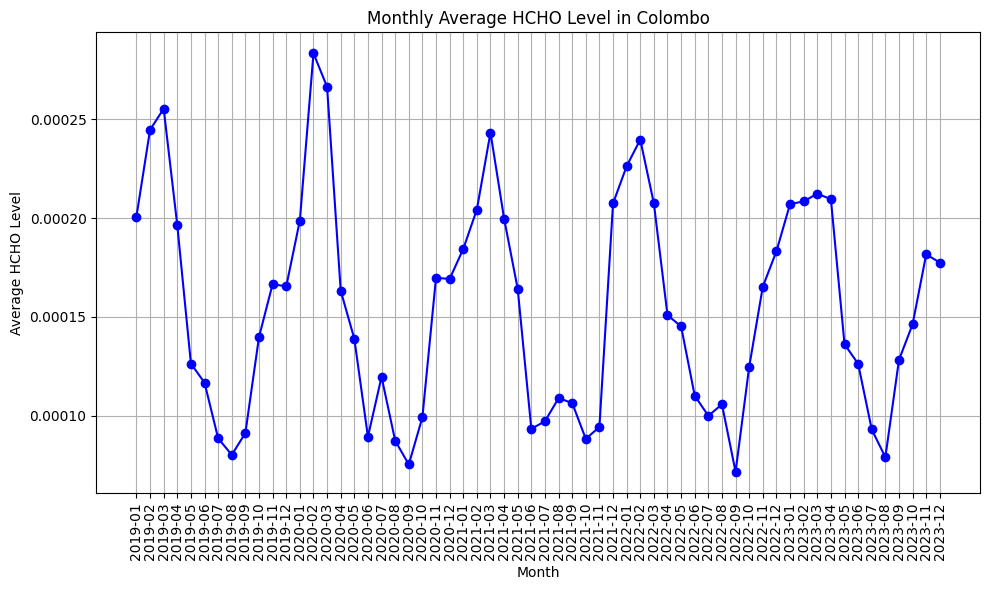

In [103]:
plot_HCHO_level_average_vs_month_graph(colombo_monthly_avg_sorted_data)